## Условие задачи

В различных отраслях промышленности (химической, нефтяной, пищевой, обрабатывающей и др.) для проведения химических реакций и физических процессов широко используются химические реакторы. Одной из простейших моделей химических реакторов является реактор идеального вытеснения, в котором реакционная смесь движется в поршневом режиме, т.е. скорости всех элементов смеси в произвольном сечении реактора одинаковы, осевое перемешивание отсутствует. Математическая модель стационарного режима работы реактора идеального вытеснения записывается в виде обыкновенного дифференциального уравнения первого порядка (ось z направлена вдоль оси реактора):
$$\frac{d}{dz}\left(uC_A\right)=R_A$$
где $u$ и $C_A$ – скорость и концентрация исходного реагента, $R_A$ – скорость протекания химической реакции, которая описывается кинетической моделью Ленгмюра-Хиншельвуда:
$$R_A=-\frac{kC_A}{\sqrt{1+K_rC_A^2}}$$
Реактор какого объема необходим для достижения 75%-ной степени превращения (конверсии) реагента? Ответ округлить до 6 знаков. Площадь поперечного сечения реактора $S=0.25\text{ м}^2$, расход реагента $Q=0.1\text{ м}^3/\text{с}$, концентрация реагента на входе в реактор $C_{A0}=1.5\text{ моль}/\text{м}^3$, коэффициенты кинетической модели $k=2\text{ с}^{-1}$ и $K_r=1\text{ моль}^2/\text{м}^6$.

## Постановка задачи

Расматривается реактор идеального вытеснения, поэтому дифференциальное уравнение для концентрации реагента можем записать в следующем виде (можем вынести скорость из производной по координате):
$$\frac{dC_A}{dz}=-\frac{kC_A}{u\sqrt{1+K_rC_A^2}}$$

Начальное условие: $C_A(0)=C_{A0}$

Решаем полученное ОДУ численно явным методом.

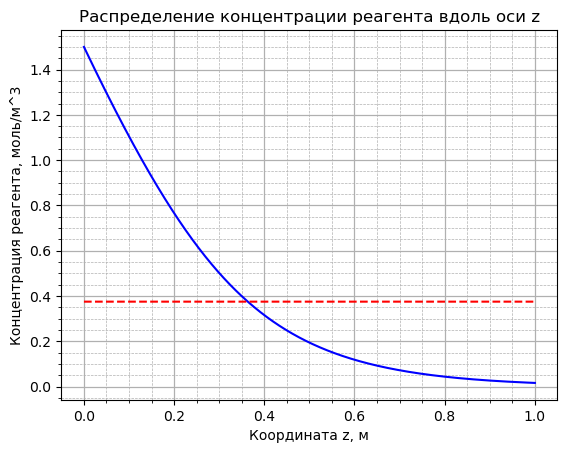

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import LineString

# входные параметры задачи
c_0 = 1.5
s = 0.25
q = 0.1
k = 2
k_r = 1

# скорость исходного реагента (используем модель реактора идеального вытеснения)
u = q / s

# равномерный список координат z
z_list = np.linspace(0, 1, 1000000)
# шаг по координате z
step = (z_list[-1] - z_list[0]) / (len(z_list) - 1)

# список концентраций реагента вдоль оси z (изначально знаем только концентрацию при z=0)
c = [c_0]

# реализация явного метода интегрирования
for z in z_list[1:]:
    c.append(c[-1] - k / u * c[-1] * step / np.sqrt(1 + k_r * c[-1]**2))

# построение распределения концентрации реагента вдоль оси z
plt.figure()
plt.plot(z_list, c, color='blue')
plt.plot(z_list, [c_0*0.25]*len(z_list),'--', color='red')
plt.xlabel('Координата z, м')
plt.ylabel('Концентрация реагента, моль/м^3')
plt.title('Распределение концентрации реагента вдоль оси z')
plt.grid(which='major', linewidth=0.9, linestyle='-')
plt.minorticks_on()
plt.grid(which='minor', linewidth=0.5, linestyle='--')

In [2]:
# находим координату, на которой достигается 75%-ая степень превращения (конверсия) реагента
l1 = LineString([(i,j) for (i,j) in zip(z_list, c)])
l2 = LineString([(i,j) for (i,j) in zip(z_list, [c_0*0.25]*len(z_list))])
intersection = l1.intersection(l2)
intersection.coords[0]

(0.3634078662946267, 0.375)

In [3]:
print(f'Необходим реактор с объёмом {intersection.coords[0][0]*s} м^3')

Необходим реактор с объёмом 0.09085196657365667 м^3
